In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans, AffinityPropagation, DBSCAN
from matplotlib import pyplot as plt


%matplotlib inline

In [2]:
data = pd.read_csv("./intersections_fiveMin.csv", sep=";")

In [3]:
data.head()

,timestamp,BTC-1ST__O,BTC-1ST__C,BTC-1ST__L,BTC-1ST__H,BTC-2GIVE__O,BTC-2GIVE__C,BTC-2GIVE__L,BTC-2GIVE__H,BTC-ABY__O,...,BTC-ZCL__L,BTC-ZCL__H,BTC-ZEC__O,BTC-ZEC__C,BTC-ZEC__L,BTC-ZEC__H,BTC-ZEN__O,BTC-ZEN__C,BTC-ZEN__L,BTC-ZEN__H
0,1.512493e+09,0.04293,0.042850,0.042850,0.042930,8.800000e-07,8.600000e-07,8.500000e-07,8.800000e-07,7.300000e-07,...,0.000193,0.000197,0.027000,0.027000,0.027000,0.027046,0.003109,0.003105,0.003078,0.003109
1,1.512494e+09,0.04291,0.043230,0.000043,0.043350,NaN,NaN,NaN,NaN,7.400000e-07,...,NaN,NaN,0.027000,0.027000,0.027000,0.027085,0.003105,0.003099,0.003099,0.003105
2,1.512494e+09,0.04324,0.000044,0.043210,0.000044,8.500000e-07,8.500000e-07,8.500000e-07,8.500000e-07,7.500000e-07,...,0.000193,0.000198,0.027000,0.027000,0.027000,0.027070,0.003099,0.003075,0.003075,0.003105
3,1.512494e+09,0.04291,0.042850,0.042850,0.042910,8.400000e-07,8.400000e-07,8.400000e-07,8.400000e-07,7.600000e-07,...,0.000195,0.000195,0.027000,0.027076,0.026980,0.027090,0.003075,0.003080,0.003075,0.003099
4,1.512494e+09,0.04286,0.000044,0.042830,0.000044,8.400000e-07,8.400000e-07,8.300000e-07,8.400000e-07,7.600000e-07,...,0.000197,0.000197,0.027076,0.027076,0.027046,0.027091,0.003090,0.003075,0.003075,0.003090


In [6]:
train = data[data["timestamp"] >= 1513357140]
train = train[train["timestamp"] < 1517653140]

In [7]:
train.head()

,timestamp,BTC-1ST__O,BTC-1ST__C,BTC-1ST__L,BTC-1ST__H,BTC-2GIVE__O,BTC-2GIVE__C,BTC-2GIVE__L,BTC-2GIVE__H,BTC-ABY__O,...,BTC-ZCL__L,BTC-ZCL__H,BTC-ZEC__O,BTC-ZEC__C,BTC-ZEC__L,BTC-ZEC__H,BTC-ZEN__O,BTC-ZEN__C,BTC-ZEN__L,BTC-ZEN__H
2880,1.513357e+09,0.034150,0.034160,0.034150,0.034430,NaN,NaN,NaN,NaN,5.600000e-07,...,0.000217,0.000217,0.025731,0.025731,0.025731,0.025933,0.001880,0.001880,0.001880,0.001881
2881,1.513358e+09,0.034150,0.034480,0.034150,0.034480,7.000000e-07,7.000000e-07,7.000000e-07,7.000000e-07,5.700000e-07,...,0.000216,0.000217,0.025731,0.025731,0.025731,0.025731,0.001880,0.001835,0.001835,0.001880
2882,1.513358e+09,0.034580,0.034640,0.034150,0.034690,6.900000e-07,6.900000e-07,6.700000e-07,6.900000e-07,5.600000e-07,...,0.000215,0.000217,0.025731,0.025940,0.025731,0.025940,0.001835,0.001836,0.001835,0.001836
2883,1.513358e+09,0.034480,0.000034,0.033960,0.034480,6.900000e-07,6.900000e-07,6.900000e-07,6.900000e-07,5.600000e-07,...,0.000215,0.000216,0.025940,0.025900,0.025868,0.026079,0.001836,0.001836,0.001836,0.001836
2884,1.513358e+09,0.000034,0.033510,0.000033,0.000034,6.900000e-07,6.900000e-07,6.900000e-07,6.900000e-07,5.600000e-07,...,0.000215,0.000215,0.026040,0.026108,0.025900,0.026108,0.001836,0.001836,0.001836,0.001836


In [11]:
train = train.fillna(0)

In [32]:
train_mean = train.as_matrix().mean(axis=0)
train_last = train.as_matrix()[-1, :]

In [31]:
! ./main --dataset_path ./intersections_fiveMin.csv --separator ; \
         --train_start 1513357140 --train_end 1517653140 \
         --test_start 1517653260 --test_end 1517664600 \ 
         --steps 50 --verbose 1 --eval 1 --predictions_out ./out_min.csv \
         --eta 0.01 --lambdaX 10000 --lambdaW 1000 --lambdaF 0.01 --standardize 1  \
         --lat_dim 2 --factor_out five_min_lat_dim2

Loss: 1.1315e+08
loss after W : 5.90618e+07
loss after F : 5.70955e+07
loss after X : 8.90886e+06
Loss after 0th iteration: 8.90886e+06
loss after W : 8.90886e+06
loss after F : 8.87823e+06
loss after X : 6.76947e+06
Loss after 1th iteration: 6.76947e+06
loss after W : 6.76182e+06
loss after F : 6.65964e+06
loss after X : 6.63774e+06
Loss after 2th iteration: 6.63774e+06
loss after W : 6.63774e+06
loss after F : 6.6309e+06
loss after X : 6.62791e+06
Loss after 3th iteration: 6.62791e+06
loss after W : 6.62791e+06
loss after F : 6.62622e+06
loss after X : 6.62499e+06
Loss after 4th iteration: 6.62499e+06
loss after W : 6.62499e+06
loss after F : 6.62411e+06
loss after X : 6.62334e+06
Loss after 5th iteration: 6.62334e+06
loss after W : 6.62334e+06
loss after F : 6.62274e+06
loss after X : 6.62217e+06
Loss after 6th iteration: 6.62217e+06
loss after W : 6.62217e+06
loss after F : 6.62171e+06
loss after X : 6.62124e+06
Loss after 7th iteration: 6.62124e+06
loss after W : 6.62124e+06
loss 

Мы обучили свой алгоритм на данных курсов криптовалют относительно биткойна за 1.5 часа и сохранили обученные матрицы в csv. Выполним кластеризацию скрытых векторов каждой криптовалюты. Повышение размерности скрытыго пространства не дало существенного прироста в качестве, поэтому мы для наглядности выбрали ее равной двум.

In [10]:
factors = pd.read_csv("./five_min_lat_dim2_F.csv")

In [11]:
factors.head()

,BTC-1ST__O,BTC-1ST__C,BTC-1ST__L,BTC-1ST__H,BTC-2GIVE__O,BTC-2GIVE__C,BTC-2GIVE__L,BTC-2GIVE__H,BTC-ABY__O,BTC-ABY__C,...,BTC-ZCL__L,BTC-ZCL__H,BTC-ZEC__O,BTC-ZEC__C,BTC-ZEC__L,BTC-ZEC__H,BTC-ZEN__O,BTC-ZEN__C,BTC-ZEN__L,BTC-ZEN__H
0,15.274715,15.150564,14.866476,15.314597,-57.736432,-57.741604,-57.799199,-57.677953,-57.790938,-57.796669,...,-5.289991,-5.005182,-3.251783,-2.572203,-3.511305,-3.362782,-1.665418,-1.516486,-2.517546,-0.732618
1,10.771327,11.371078,11.688594,11.498408,-24.761453,-24.763587,-24.581362,-24.926907,9.569337,9.555018,...,0.536708,1.944324,-0.492821,-0.917511,-1.826766,-1.766696,-0.272603,-0.231567,-0.366555,-0.608479


In [47]:
cluster_ = KMeans(5)

In [48]:
labels = cluster_.fit_predict(factors.T)

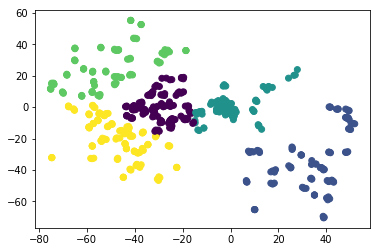

In [50]:
plt.scatter(factors.iloc[0], factors.iloc[1], c=labels)

Мы провели качественное ислледование и сделали вывод, что в данных присутсвуют 5 ярко выраженных кластеров, из которых можно делать долгосрочные прогнозы.

Кроме того мы изобразили среднеквадратичное отклонение от истинных значений суммарно по всем валютам.

In [54]:
predictions = pd.read_csv("./out_min.csv")

In [55]:
predictions.head()

,timestamp,BTC-1ST__O,BTC-1ST__C,BTC-1ST__L,BTC-1ST__H,BTC-2GIVE__O,BTC-2GIVE__C,BTC-2GIVE__L,BTC-2GIVE__H,BTC-ABY__O,...,BTC-ZCL__L,BTC-ZCL__H,BTC-ZEC__O,BTC-ZEC__C,BTC-ZEC__L,BTC-ZEC__H,BTC-ZEN__O,BTC-ZEN__C,BTC-ZEN__L,BTC-ZEN__H
0,1517653504,0.042465,0.042053,0.041443,0.042331,9.057738e-07,9.055968e-07,9.024437e-07,9.086236e-07,0.000002,...,0.063393,0.101069,0.555080,0.539727,0.558761,0.657224,0.018318,0.020256,0.020056,0.015560
1,1517653760,0.042714,0.042292,0.041670,0.042573,8.811491e-07,8.809731e-07,8.778543e-07,8.839711e-07,0.000002,...,0.060378,0.097055,0.545224,0.532842,0.549933,0.648088,0.018063,0.020009,0.019642,0.015496
2,1517654144,0.042687,0.042277,0.041665,0.042558,8.893865e-07,8.892102e-07,8.861392e-07,8.921626e-07,0.000002,...,0.062196,0.099860,0.550093,0.535467,0.552307,0.650509,0.018187,0.020131,0.019848,0.015494
3,1517654400,0.043057,0.042678,0.042082,0.042965,8.758608e-07,8.756852e-07,8.728784e-07,8.783939e-07,0.000002,...,0.063884,0.103696,0.551173,0.533012,0.545068,0.642870,0.018209,0.020157,0.019898,0.015361
4,1517654656,0.042684,0.042300,0.041707,0.042582,9.028022e-07,9.026254e-07,8.996750e-07,9.054641e-07,0.000002,...,0.065739,0.105477,0.559150,0.539971,0.555759,0.653998,0.018418,0.020357,0.020231,0.015474


In [16]:
true = pd.read_csv("./intersections_fiveMin.csv", ";")
true.head()

,timestamp,BTC-1ST__O,BTC-1ST__C,BTC-1ST__L,BTC-1ST__H,BTC-2GIVE__O,BTC-2GIVE__C,BTC-2GIVE__L,BTC-2GIVE__H,BTC-ABY__O,...,BTC-ZCL__L,BTC-ZCL__H,BTC-ZEC__O,BTC-ZEC__C,BTC-ZEC__L,BTC-ZEC__H,BTC-ZEN__O,BTC-ZEN__C,BTC-ZEN__L,BTC-ZEN__H
0,1.512493e+09,0.04293,0.042850,0.042850,0.042930,8.800000e-07,8.600000e-07,8.500000e-07,8.800000e-07,7.300000e-07,...,0.000193,0.000197,0.027000,0.027000,0.027000,0.027046,0.003109,0.003105,0.003078,0.003109
1,1.512494e+09,0.04291,0.043230,0.000043,0.043350,NaN,NaN,NaN,NaN,7.400000e-07,...,NaN,NaN,0.027000,0.027000,0.027000,0.027085,0.003105,0.003099,0.003099,0.003105
2,1.512494e+09,0.04324,0.000044,0.043210,0.000044,8.500000e-07,8.500000e-07,8.500000e-07,8.500000e-07,7.500000e-07,...,0.000193,0.000198,0.027000,0.027000,0.027000,0.027070,0.003099,0.003075,0.003075,0.003105
3,1.512494e+09,0.04291,0.042850,0.042850,0.042910,8.400000e-07,8.400000e-07,8.400000e-07,8.400000e-07,7.600000e-07,...,0.000195,0.000195,0.027000,0.027076,0.026980,0.027090,0.003075,0.003080,0.003075,0.003099
4,1.512494e+09,0.04286,0.000044,0.042830,0.000044,8.400000e-07,8.400000e-07,8.300000e-07,8.400000e-07,7.600000e-07,...,0.000197,0.000197,0.027076,0.027076,0.027046,0.027091,0.003090,0.003075,0.003075,0.003090


In [17]:
tmp = true[1517664600 > true["timestamp"]]

In [18]:
tmp = tmp[tmp["timestamp"] >= 1517653260]

In [33]:
def calc_metrics(true, pred):
    den = np.where(np.isnan(true), 0, np.abs(true)).sum() / np.where(np.isnan(true), 1, 0).sum()
    rmse = np.sqrt(np.where(np.isnan(true), 0, (tmp - pred) ** 2).sum() / np.where(np.isnan(true), 1, 0).sum())
    rmse /= den
    nd = np.where(np.isnan(true), 0, np.abs(true - pred)).sum() / np.where(np.isnan(true), 1, 0).sum()
    nd /= den
    return rmse, nd

In [34]:
calc_metrics(tmp, train_mean)

(0.0170622599981502, 0.0014193198989220178)

In [35]:
calc_metrics(tmp, train_last)

(5.3888965620077994e-05, 4.051530412039379e-06)

Видим, что наш метод работает лучше, чем  